# Airbnb Price Prediction

## Data Collection

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

df = pd.read_csv("AB_NYC_2019.csv")

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df['reviews_per_month'].fillna(0, inplace=True)

C:\Users\Rohan\AppData\Local\Temp\ipykernel_24232\1792330394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews_per_month'].fillna(0, inplace=True)


In [6]:
df.dropna(subset = ['name', 'host_name'], inplace = True)

In [7]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.drop(columns = ['id', 'name', 'host_id', 'host_name', 'last_review'], inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48858 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48858 non-null  object 
 1   neighbourhood                   48858 non-null  object 
 2   latitude                        48858 non-null  float64
 3   longitude                       48858 non-null  float64
 4   room_type                       48858 non-null  object 
 5   price                           48858 non-null  int64  
 6   minimum_nights                  48858 non-null  int64  
 7   number_of_reviews               48858 non-null  int64  
 8   reviews_per_month               48858 non-null  float64
 9   calculated_host_listings_count  48858 non-null  int64  
 10  availability_365                48858 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.5+ MB


## Data Exploration

In [10]:
# Average price by neighbourhood group
price_by_neighbourhood = df.groupby("neighbourhood_group")["price"].mean().sort_values(ascending=False)
print("Average Price by Neighbourhood Group:\n", price_by_neighbourhood)

Average Price by Neighbourhood Group:
 neighbourhood_group
Manhattan        196.897473
Brooklyn         124.410523
Staten Island    114.812332
Queens            99.536017
Bronx             87.469238
Name: price, dtype: float64


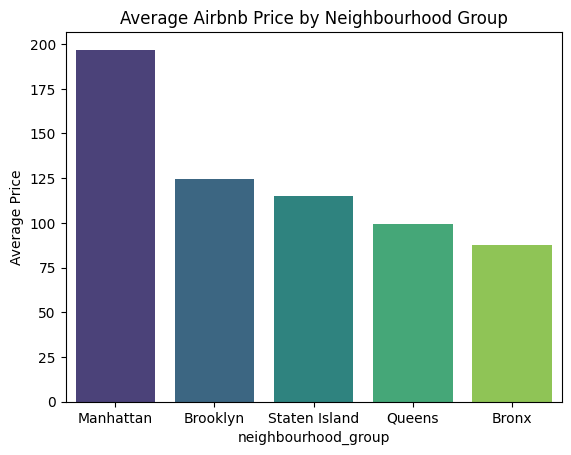

In [11]:
sns.barplot(x=price_by_neighbourhood.index, y=price_by_neighbourhood.values, hue = price_by_neighbourhood.index, palette='viridis')
plt.ylabel("Average Price")
plt.title("Average Airbnb Price by Neighbourhood Group")
plt.show()

In [12]:
# Average price by room type
price_by_room_type = df.groupby("room_type")["price"].mean().sort_values(ascending=False)
print("\nAverage Price by Room Type:\n", price_by_room_type)


Average Price by Room Type:
 room_type
Entire home/apt    211.806994
Private room        89.794360
Shared room         70.075928
Name: price, dtype: float64


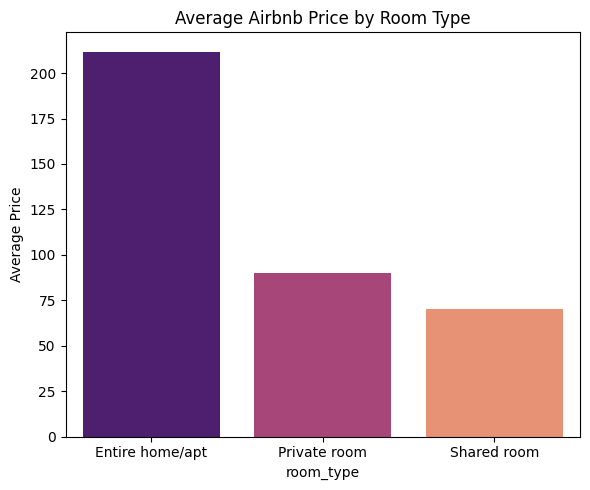

In [13]:
plt.figure(figsize=(6, 5))
sns.barplot(x=price_by_room_type.index, y=price_by_room_type.values, hue = price_by_room_type.index, palette="magma")
plt.ylabel("Average Price")
plt.title("Average Airbnb Price by Room Type")
plt.tight_layout()
plt.show()

In [14]:
# Combined average price by both
price_by_combination = df.groupby(["neighbourhood_group", "room_type"])["price"].mean().unstack()
print("\nAverage Price by Neighbourhood and Room Type:\n", price_by_combination)


Average Price by Neighbourhood and Room Type:
 room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                     127.645503     66.788344    58.610169
Brooklyn                  178.362609     76.510619    50.527845
Manhattan                 249.238211    116.805594    88.977083
Queens                    147.050573     71.776855    69.020202
Staten Island             173.846591     62.292553    57.444444


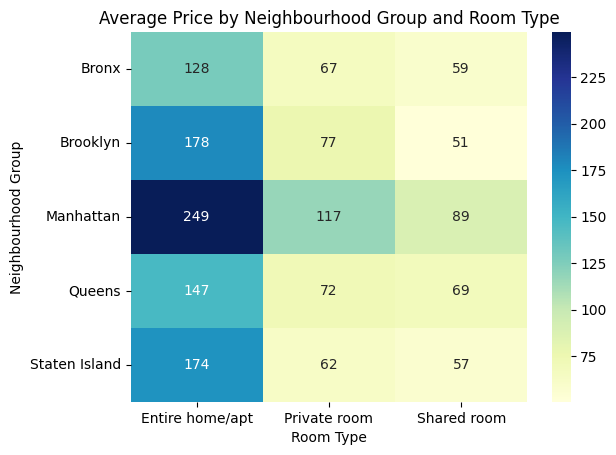

In [15]:
sns.heatmap(price_by_combination, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Neighbourhood Group and Room Type")
plt.ylabel("Neighbourhood Group")
plt.xlabel("Room Type")
plt.yticks(rotation = 0)
plt.show()

In [16]:
# Basic statistics of review-related columns
print(df[['number_of_reviews', 'reviews_per_month']].describe())

       number_of_reviews  reviews_per_month
count       48858.000000       48858.000000
mean           23.273098           1.091124
std            44.549898           1.597270
min             0.000000           0.000000
25%             1.000000           0.040000
50%             5.000000           0.370000
75%            24.000000           1.580000
max           629.000000          58.500000


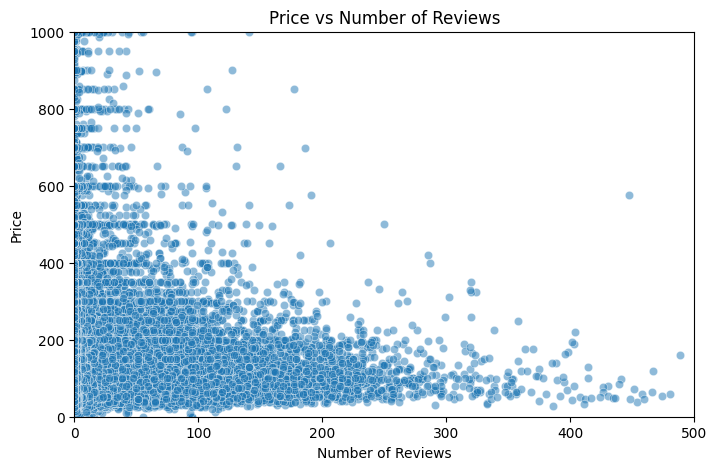

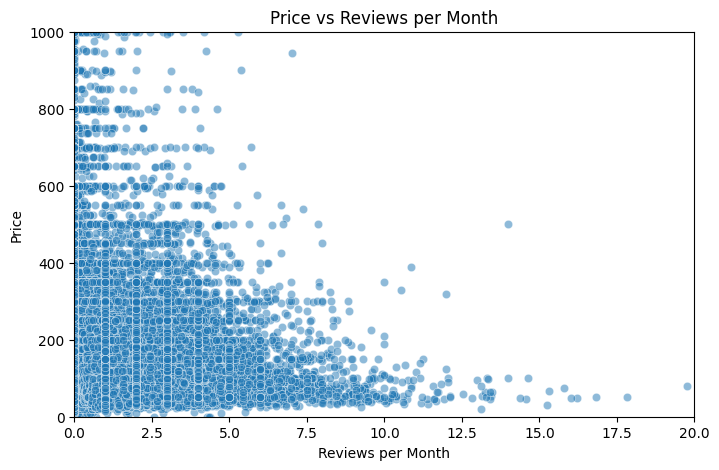

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title("Price vs Number of Reviews")
plt.xlim(0, 500)
plt.ylim(0, 1000)
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='reviews_per_month', y='price', alpha=0.5)
plt.xlim(0, 20)
plt.ylim(0, 1000)
plt.title("Price vs Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Price")
plt.show()

In [18]:
# Correlation check
corr_reviews = df[['price', 'number_of_reviews', 'reviews_per_month']].corr()
print("Correlation with Price:\n", corr_reviews['price'].sort_values(ascending=False))

Correlation with Price:
 price                1.000000
number_of_reviews   -0.047949
reviews_per_month   -0.050586
Name: price, dtype: float64


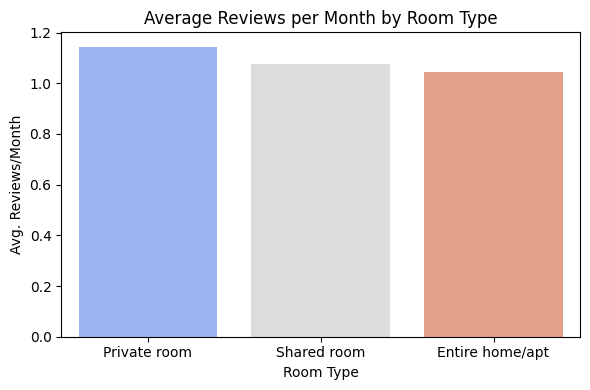

In [19]:
# Average reviews per room type
review_rate = df.groupby("room_type")["reviews_per_month"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=review_rate.index, y=review_rate.values, hue = review_rate.index, palette='coolwarm')
plt.title("Average Reviews per Month by Room Type")
plt.ylabel("Avg. Reviews/Month")
plt.xlabel("Room Type")
plt.tight_layout()
plt.show()

In [20]:
original_df = df

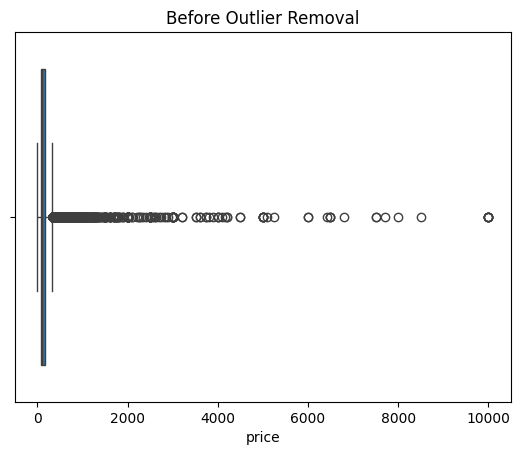

In [21]:
# Before filtering (use original df before outlier removal)
sns.boxplot(x=original_df['price'])
plt.title("Before Outlier Removal")
plt.show()

In [22]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Price range after IQR filtering:", df['price'].min(), "-", df['price'].max())


Price range after IQR filtering: 0 - 10000


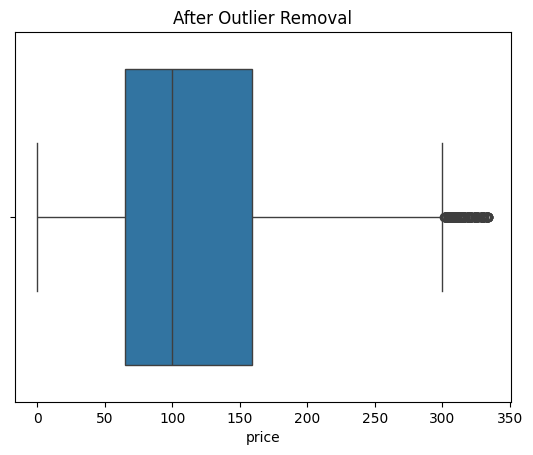

In [23]:
# After filtering
sns.boxplot(x=df2['price'])
plt.title("After Outlier Removal")
plt.show()

In [24]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Preview encoded data
print(df_encoded.head())
print("\nEncoded Columns:\n", df_encoded.columns.tolist())

  neighbourhood  latitude  longitude  price  minimum_nights  \
0    Kensington  40.64749  -73.97237    149               1   
1       Midtown  40.75362  -73.98377    225               1   
2        Harlem  40.80902  -73.94190    150               3   
3  Clinton Hill  40.68514  -73.95976     89               1   
4   East Harlem  40.79851  -73.94399     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0               0.00                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  neighbourhood_group_Brooklyn  \
0               365                          True   
1               355                         False   
2          

In [25]:
nyc_map = mpimg.imread("NYC.png", format = 'jpeg')

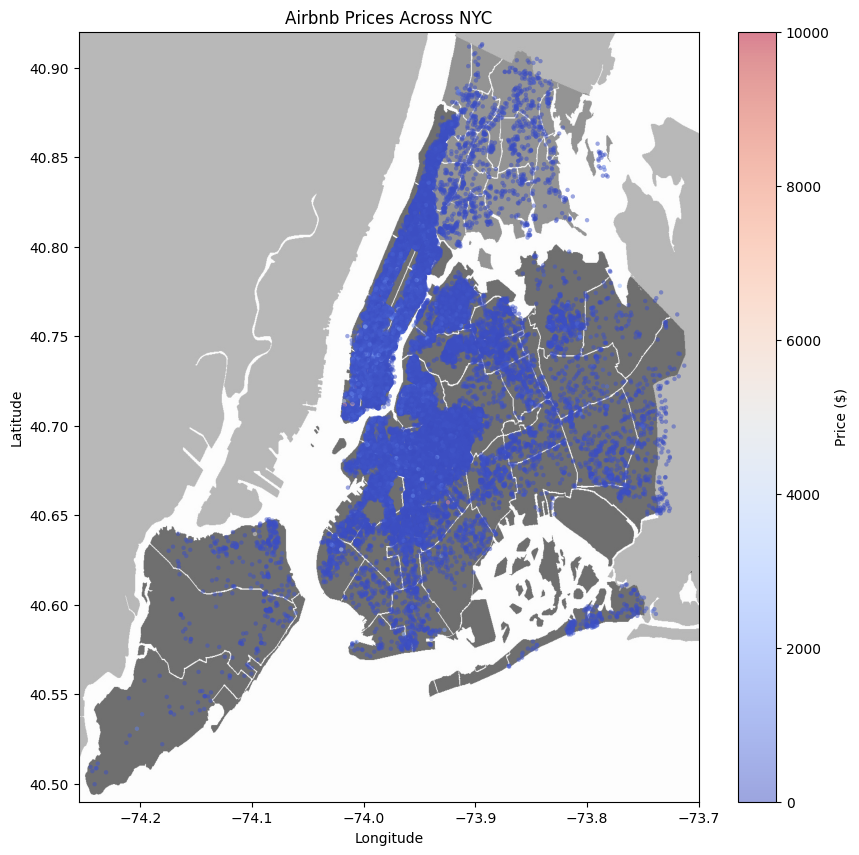

In [26]:
# Set up the figure and display map
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(nyc_map, extent=[-74.255, -73.7, 40.49, 40.92], aspect='auto')

# Plot scatter points
scatter = ax.scatter(
    df['longitude'], df['latitude'],
    c=df['price'], cmap='coolwarm', alpha=0.5,
    s=10, edgecolors='none'
)

# Add color bar for price
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Price ($)")

# Map formatting
ax.set_title("Airbnb Prices Across NYC")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.xlim(-74.255, -73.7)
plt.ylim(40.49, 40.92)
plt.grid(False)

plt.show()

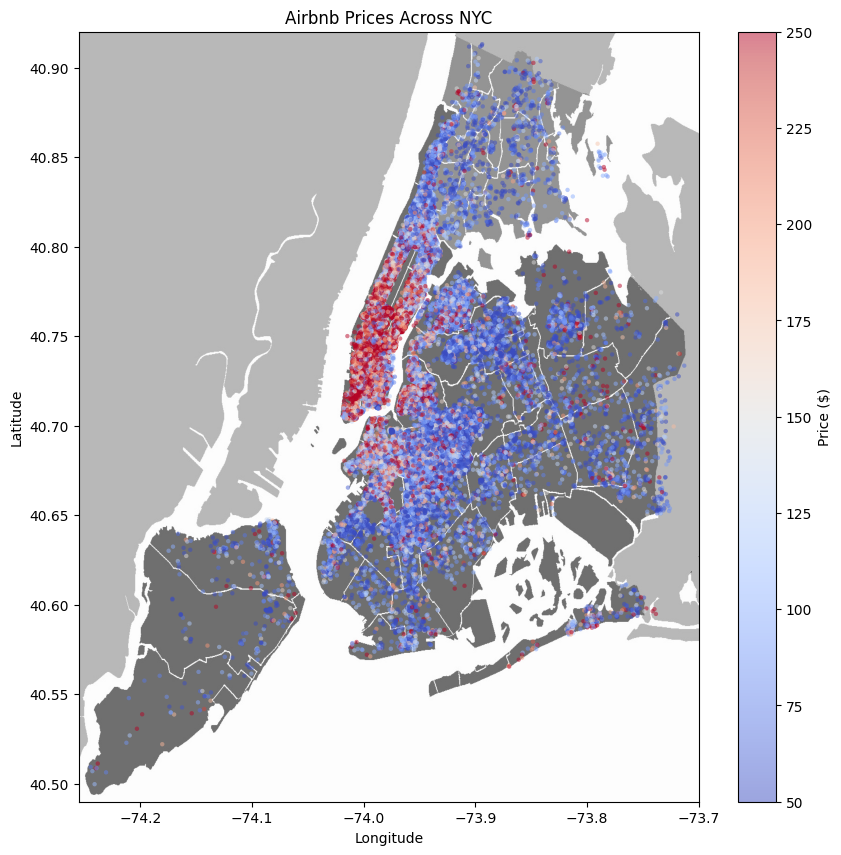

In [34]:
# Set up the figure and display map
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(nyc_map, extent=[-74.255, -73.7, 40.49, 40.92], aspect='auto')

# Plot scatter points with specified color range
scatter = ax.scatter(
    df['longitude'], df['latitude'],
    c=df['price'], cmap='coolwarm', alpha=0.5,
    s=10, edgecolors='none',
    vmin=50, vmax=250
)

# Add color bar for price
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Price ($)")

# Map formatting
ax.set_title("Airbnb Prices Across NYC")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.xlim(-74.255, -73.7)
plt.ylim(40.49, 40.92)
plt.grid(False)

plt.show()

In [35]:
# Correlation matrix
corr = df[['price', 'number_of_reviews', 'reviews_per_month']].corr()
print(corr['price'].sort_values(ascending=False))

price                1.000000
number_of_reviews   -0.047949
reviews_per_month   -0.050586
Name: price, dtype: float64


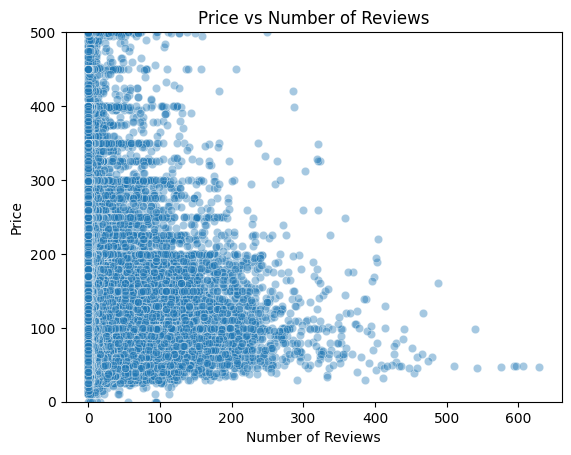

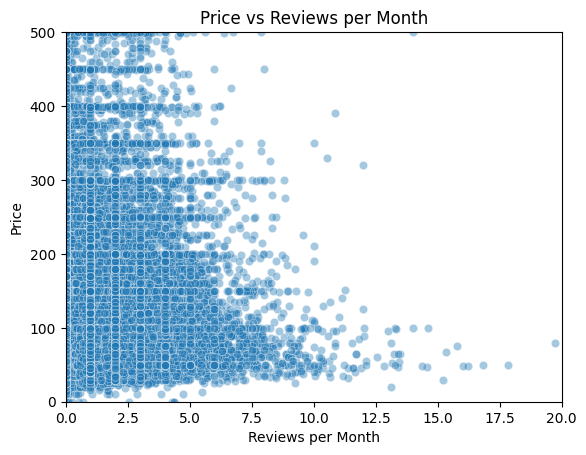

In [38]:
# Price vs Number of Reviews
# plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.4)
plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")
plt.ylim(0, 500)
plt.show()

# Price vs Reviews per Month
# plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='reviews_per_month', y='price', alpha=0.4)
plt.title("Price vs Reviews per Month")
plt.xlabel("Reviews per Month")
plt.ylabel("Price")
plt.xlim(0, 20)
plt.ylim(0, 500)
plt.show()

C:\Users\Rohan\AppData\Local\Temp\ipykernel_24232\1423292549.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_reviews = df.groupby('review_bin')['price'].mean()


Average Price by Review Count Range:
 review_bin
(0, 10]         148.836969
(10, 50]        139.140507
(50, 100]       130.423630
(100, 200]      129.882902
(200, 500]      114.409888
(500, 10000]     54.250000
Name: price, dtype: float64


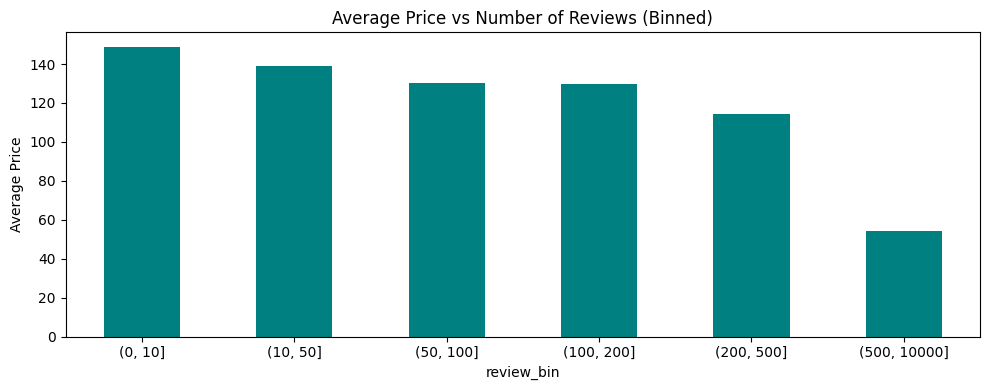

In [45]:
# Bin reviews into ranges
df['review_bin'] = pd.cut(df['number_of_reviews'], bins=[0, 10, 50, 100, 200, 500, 10000])

# Average price per bin
avg_price_by_reviews = df.groupby('review_bin')['price'].mean()

print("Average Price by Review Count Range:\n", avg_price_by_reviews)

# Plot it
avg_price_by_reviews.plot(kind='bar', figsize=(10, 4), color='teal')
plt.ylabel("Average Price")
plt.title("Average Price vs Number of Reviews (Binned)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['number_of_reviews', 'reviews_per_month']]
y = df['price']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Show coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))


Intercept: 161.84226361381164
Coefficients: {'number_of_reviews': np.float64(-0.14986065474746305), 'reviews_per_month': np.float64(-5.14536753006094)}
